In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

np.random.seed(42)

In [15]:
df = pd.read_csv('./data/course_page_actions.csv')
df.head()

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437


In [16]:
# Get dataframe with all records from control group
control_df = df.query('group == "control"')

# Compute click through rate for control group
control_ctr = control_df.query('action == "enroll"').id.nunique() / control_df.query('action == "view"').id.nunique()

# Display click through rate
control_ctr

0.012827090815802977

In [17]:
# Get dataframe with all records from experiment group
experiment_df = df.query('group == "experiment"')

# Compute click through rate for experiment group
experiment_ctr = experiment_df.query('action == "enroll"').id.nunique() / experiment_df.query('action == "view"').id.nunique()

# Display click through rate
experiment_ctr

0.007696007696007696

In [18]:
# Compute the observed difference in click through rates
obs_diff = control_ctr - experiment_ctr

# Display observed difference
obs_diff

0.00513108311979528

In [19]:
# Create a sampling distribution of the difference in proportions
# with bootstrapping
diffs = []
for _ in range(10000):
    bootsample = df.sample(df.shape[0], replace=True)
    control_df = bootsample.query('group == "control"')
    experiment_df = bootsample.query('group == "experiment"')
    control_ctr = control_df.query('action == "enroll"').id.nunique() / control_df.query('action == "view"').id.nunique()
    experiment_ctr = experiment_df.query('action == "enroll"').id.nunique() / experiment_df.query('action == "view"').id.nunique()
    diffs.append(experiment_ctr - control_ctr)


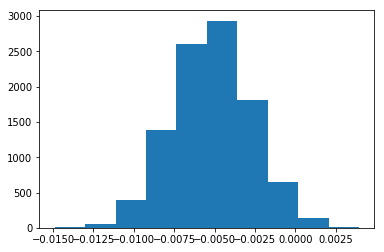

In [20]:
plt.hist(diffs);

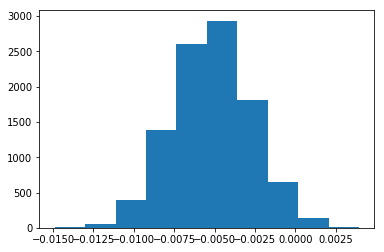

In [21]:
# Convert to numpy array
diffs = np.array(diffs)
null_valls = np.random.normal(0, diffs.std(), diffs.size)

# Plot sampling distribution
plt.hist(diffs);

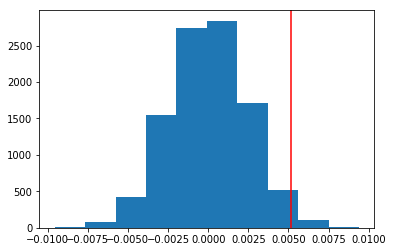

In [22]:
# Simulate distribution under the null hypothesis
null_vals = (null_valls > obs_diff).mean()

# Plot the null distribution
plt.hist(null_valls);
plt.axvline(x=obs_diff, color='red');

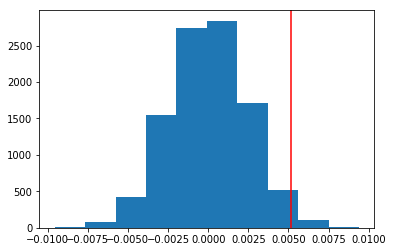

In [23]:
# Plot observed statistic with the null distibution
plt.hist(null_valls);
plt.axvline(x=obs_diff, color='red');


In [25]:
# Compute p-value
null_vals = (null_valls > obs_diff).mean()
null_vals

0.0189